In [24]:
 ## linear Regression algorithm

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings("ignore")


In [11]:
# Load the dataset
df = pd.read_csv("Housing.csv")

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
df.describe() # summary

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


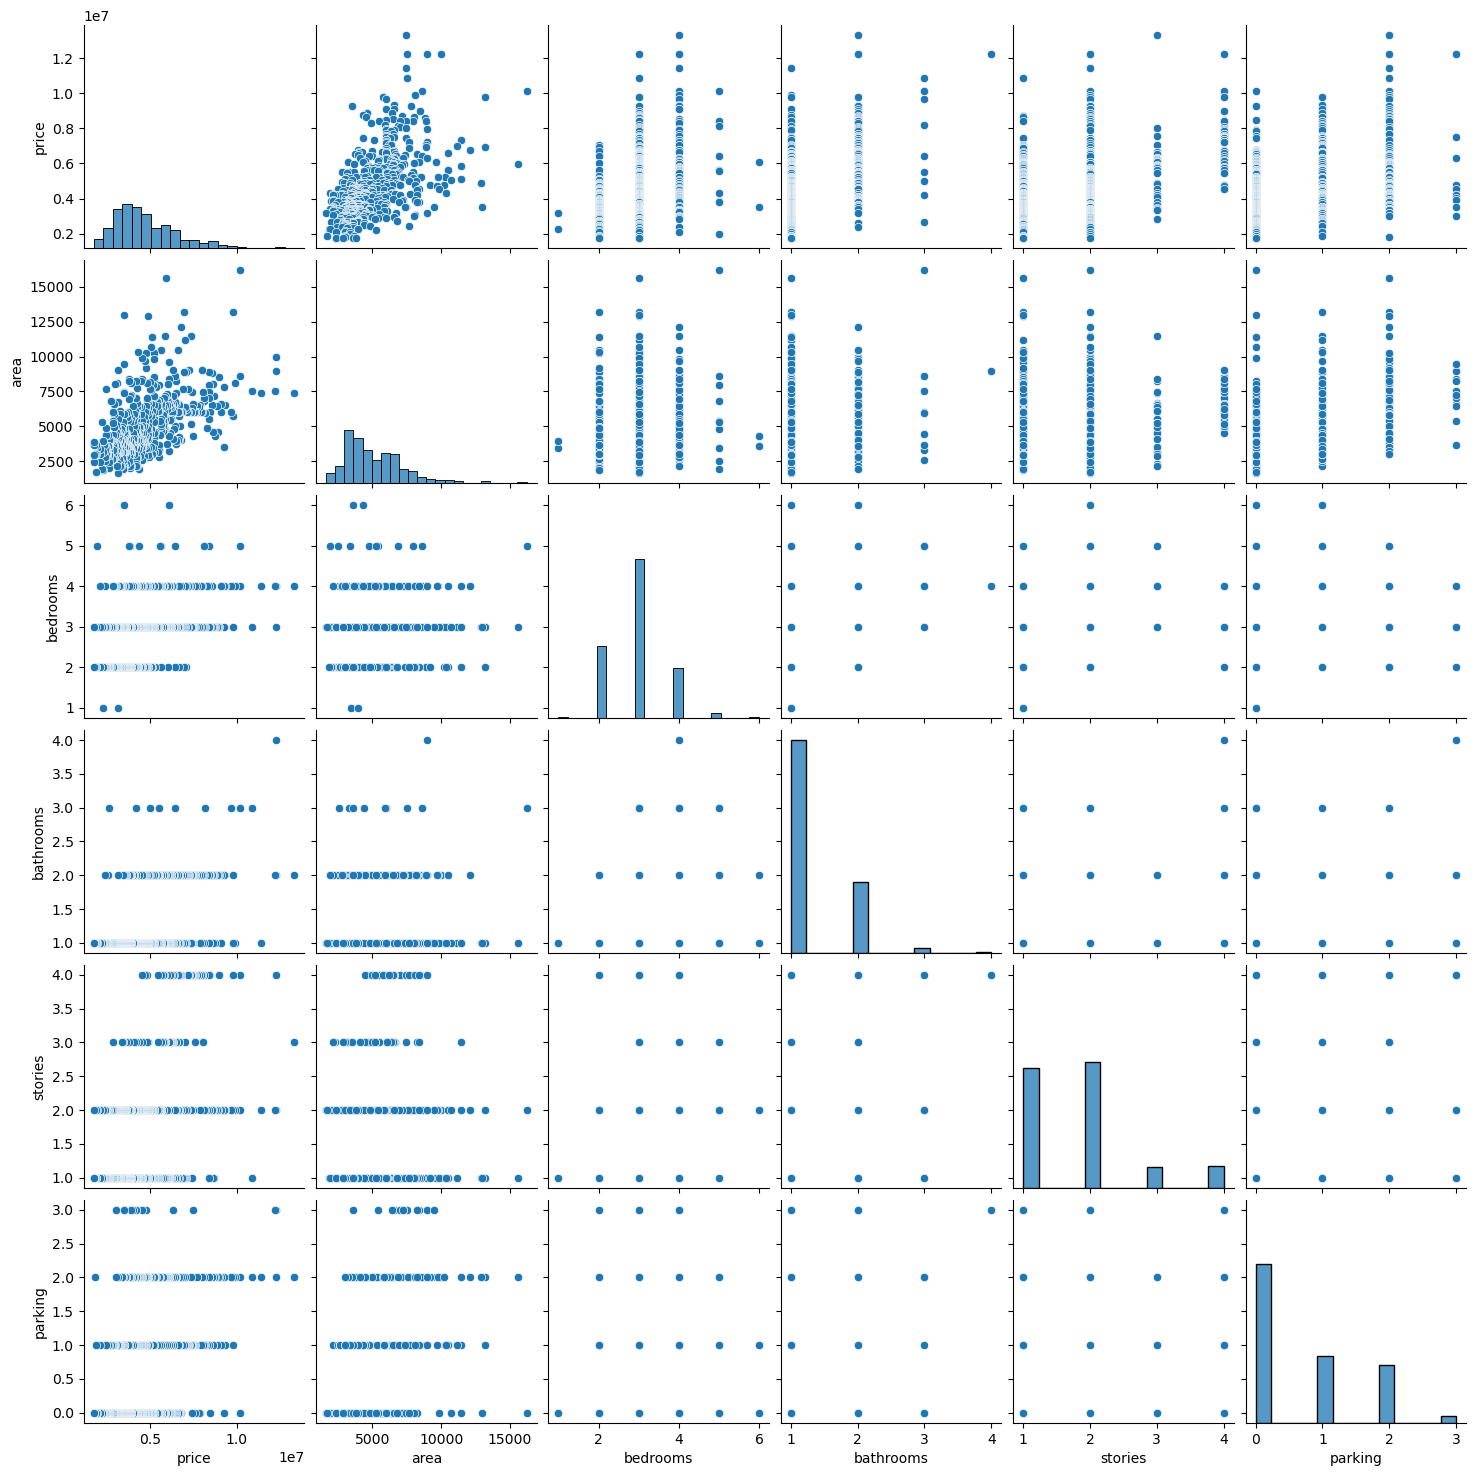

In [19]:
# pairplot to visual relationship between variable

sns.pairplot(df)

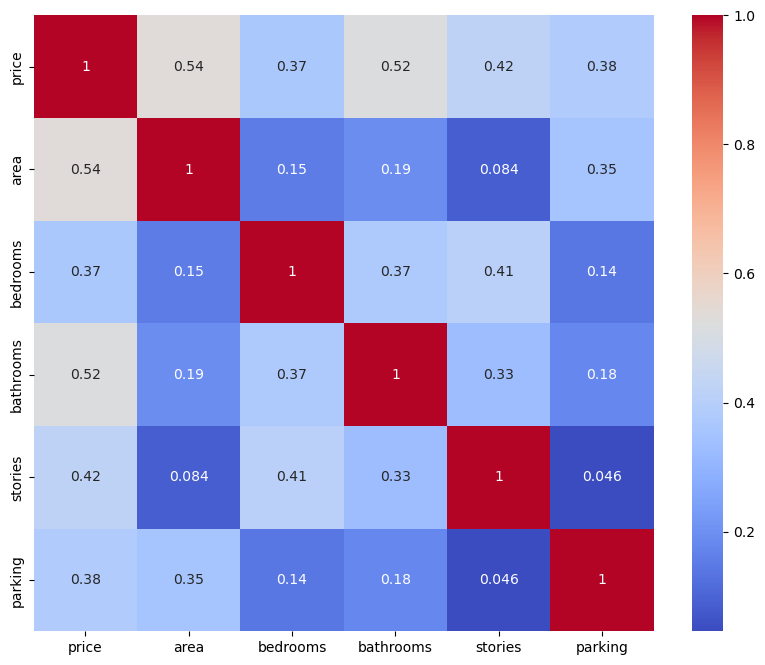

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.xlabel('')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Fixed colormap name
plt.show()


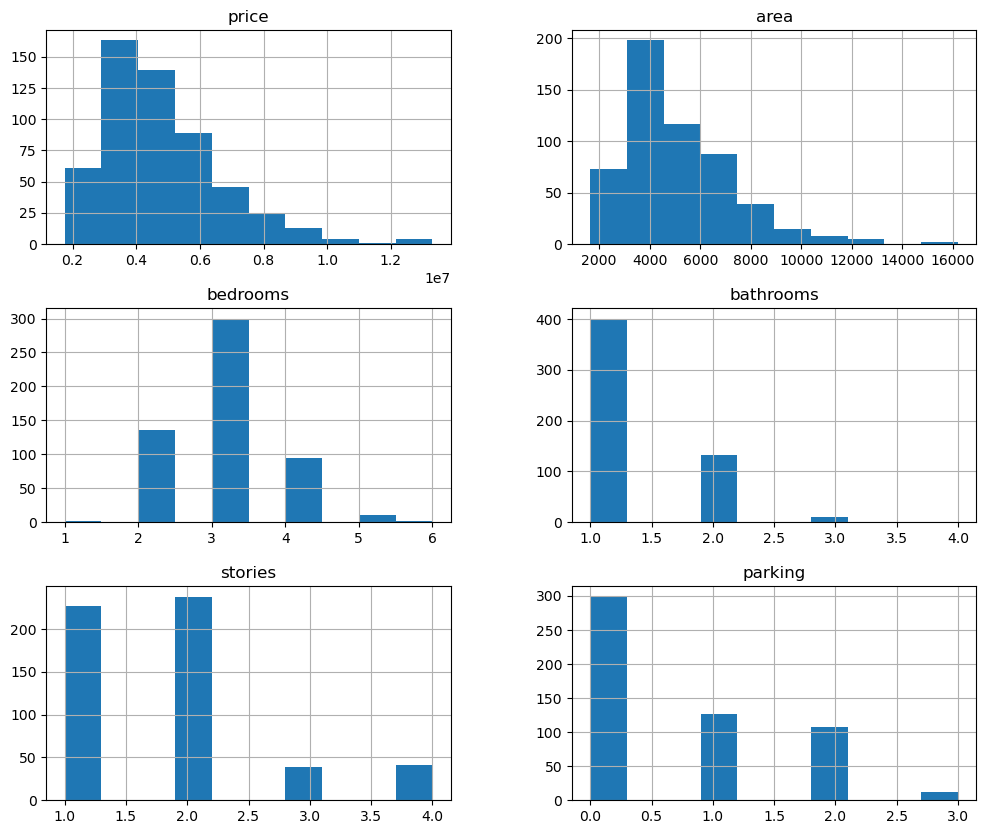

In [21]:
# Histrogram for indivisual feature
df.hist(figsize=(12,10))
plt.show()

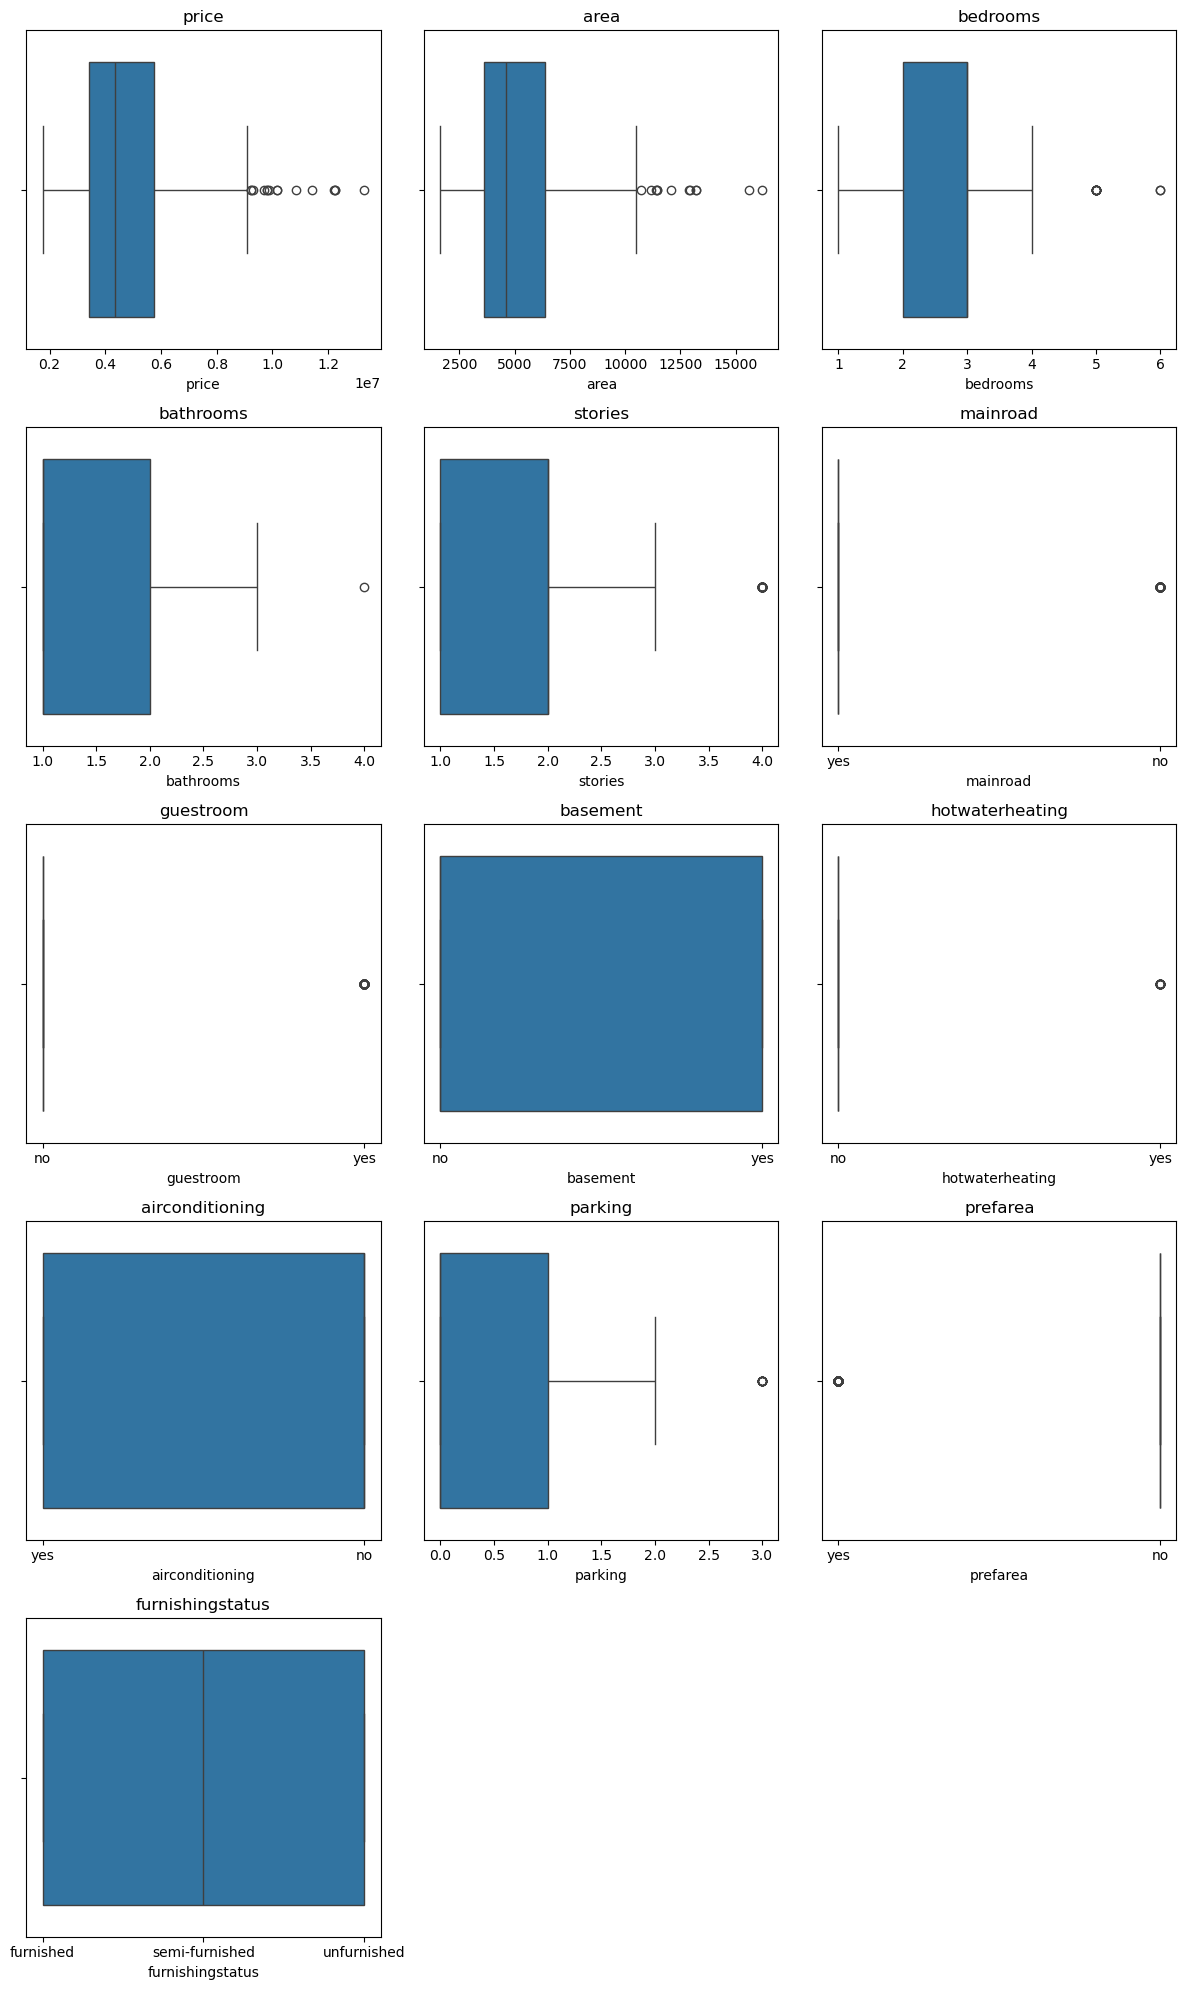

In [25]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of columns in the DataFrame
num_columns = len(df.columns)

# Calculate grid size for subplots
rows = math.ceil(num_columns / 3)  # 3 columns per row

# Create box plots for each column
plt.figure(figsize=(12, rows * 4))  # Adjust figure size based on rows
for i, column in enumerate(df.columns):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [26]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
# Define the target variable and the predicter variable
x = df[['area']] # predicter
y = df[['price']] # Target


In [31]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# Create and train the model

simple_model = LinearRegression()
simple_model.fit(x_train, y_train)

LinearRegression()

Mean Squared Error: 3675286604768.185
R^2 Score:0.27287851871974644


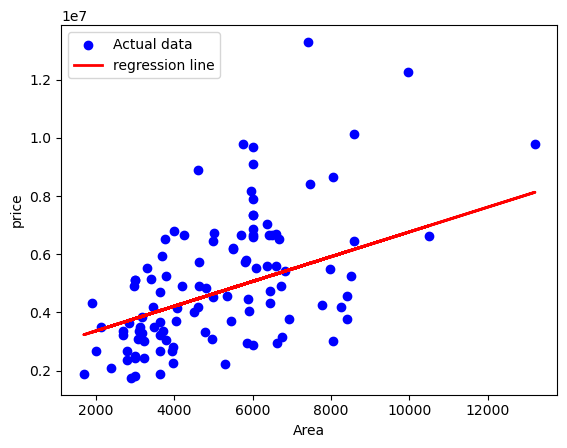

In [35]:
# prediction
y_pred = simple_model.predict(x_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score:{r2_score(y_test, y_pred)}')

# Plot the  regretion line
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='regression line')
plt.xlabel('Area')
plt.ylabel('price')
plt.legend()
plt.show()


In [48]:
# Assuming the model has already been trained and relevant lobraries havebeen iported

# input medInc value from the user
price_value = float(input("Enter the Medicnc value:"))

# convert the imput to a 2D array for the model
price_value_array = np.array([[price_value]])

# Predict the house price using the trained model
predicted_price = simple_model.predict(price_value_array)

# Output the prediction
print(f"The predicted house price for medInc value of{price_value} is:{predicted_price[0]:2f}")


Enter the Medicnc value: 12215000


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [52]:
# MULTIPLE REGRESSION PROBLEM
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
# DRDFINE MULTIPLE PREDICTOR
x_multi = df[['area','bedrooms','bathrooms','stories','parking']]
y_multi = df['price']

In [64]:
# split the into training sets
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi,
                                                                           test_size=0.2, random_state=42)

In [66]:
multi_model = LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

LinearRegression()

In [74]:
# Predictions
y_pred_multi = multi_model.predict(x_test_multi)

#Evaluete the model
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}")
print(f'R^2 score:{r2_score(y_test_multi, y_pred_multi)}')

Mean Squared Error: 2292721545725.361
R^2 score:0.5464062355495873


In [80]:
# Display the coefficients of the model
coefficients = pd.DataFrame(multi_model.coef_, x_multi.columns, columns=['Coefficient'])
coefficients 

,Coefficient
area,3.088670e+02
bedrooms,1.512468e+05
bathrooms,1.185732e+06
stories,4.951008e+05
parking,3.376608e+05
